#To begin with, we will download the data and import the necessary libraries

In [ ]:
#upload kaggle.json
from google.colab import files
files.upload()

In [7]:
!pip install -q kaggle

In [8]:
!mkdir -p ~/.kaggle

In [9]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

In [ ]:
!unzip /content/emotions-dataset-for-nlp.zip

In [ ]:
!pip install transformers

In [4]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.nn.functional as F
from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,matthews_corrcoef

from tqdm import tqdm, trange,tnrange,tqdm_notebook
import random
import os
import io

%matplotlib inline

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

SEED = 0

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if device == torch.device("cuda"):
    torch.cuda.manual_seed_all(SEED)

In [13]:
df_train = pd.read_csv("/content/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_test = pd.read_csv("/content/test.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("/content/val.txt", delimiter=';', header=None, names=['sentence','label'])

In [15]:
df_train.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [16]:
df = pd.concat([df_train,df_test,df_val])

In [26]:
classes = df['label'].unique().tolist()
classes

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [40]:
n_values = []

for cl in classes:
    n = df[df['label'] == cl].count().tolist()[1]
    n_values.append(n)

n_values

[5797, 2709, 1641, 719, 2373, 6761]

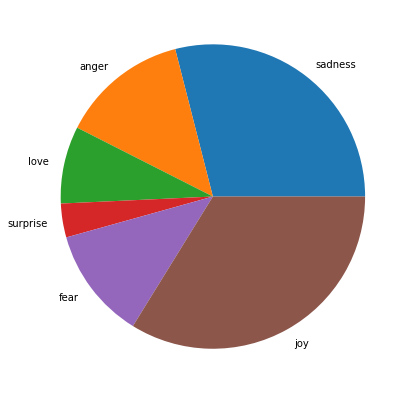

In [43]:
plt.figure(figsize=(7, 7))
plt.pie(n_values, labels = classes)
plt.show()

a little unbalanced